In [1]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
df =pd.read_csv('demand.csv')

In [ ]:
df

Timestamp  Demand (MW)  Demand (MU)
0      01-04-2021 00:00    13708.812        3.427
1      01-04-2021 00:15    13697.444        3.424
2      01-04-2021 00:30    13619.332        3.405
3      01-04-2021 00:45    13711.564        3.428
4      01-04-2021 01:00    13683.300        3.421
...                 ...          ...          ...
70075  31-03-2023 22:45    14120.940        3.530
70076  31-03-2023 23:00    14137.616        3.534
70077  31-03-2023 23:15    14143.768        3.536
70078  31-03-2023 23:30    14062.976        3.516
70079  31-03-2023 23:45    13924.084        3.481

[70080 rows x 3 columns]

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M', errors='coerce')

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(df, x='Timestamp', y='Demand (MW)', title='Energy Consumption')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
fig = px.line(df, x='Timestamp', y='Demand (MU)', title='Energy Consumption')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
el_df=df.set_index('Timestamp')

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

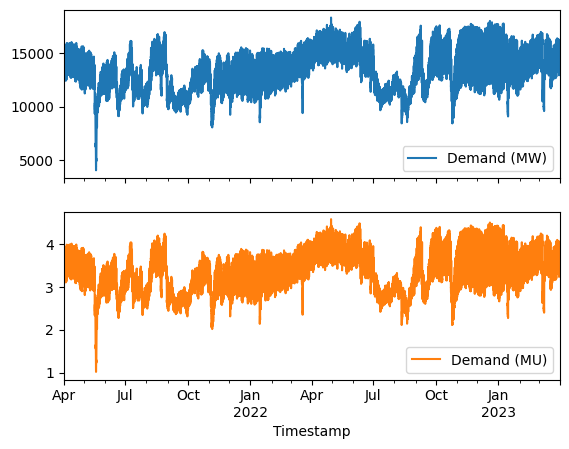

In [ ]:
el_df.plot(subplots=True)

In [ ]:
print ("\nMissing values :  ", df.isnull().any())


Missing values :   Timestamp      False
Demand (MW)    False
Demand (MU)    False
dtype: bool


In [ ]:
el_df.resample('M').mean()

Demand (MW)  Demand (MU)
Timestamp                            
2021-04-30  13931.958889     3.482994
2021-05-31  11967.801804     2.991949
2021-06-30  12143.790917     3.035950
2021-07-31  12262.603302     3.065657
2021-08-31  13775.242780     3.443814
2021-09-30  10786.690381     2.696672
2021-10-31  12600.791065     3.150197
2021-11-30  12065.424744     3.016368
2021-12-31  12644.434644     3.161108
2022-01-31  12563.063487     3.140771
2022-02-28  13179.173920     3.294802
2022-03-31  14148.156700     3.537036
2022-04-30  15346.386225     3.836606
2022-05-31  15165.532383     3.791374
2022-06-30  14609.884771     3.652461
2022-07-31  11458.711288     2.864684
2022-08-31  11399.134931     2.849785
2022-09-30  13549.257201     3.387314
2022-10-31  13795.015773     3.448764
2022-11-30  14473.037286     3.618260
2022-12-31  14392.476663     3.598128
2023-01-31  13795.473621     3.448865
2023-02-28  14340.448074     3.585123
2023-03-31  14185.076716     3.546272

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

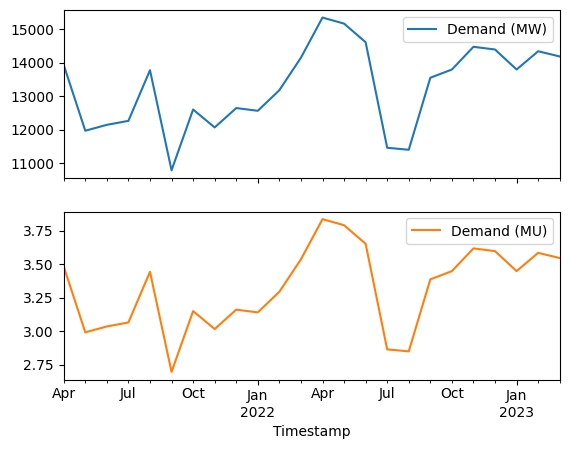

In [ ]:
el_df.resample('M').mean().plot(subplots=True)

In [ ]:
final_df=el_df.resample('M').mean()

In [ ]:
import pmdarima as pm
model = pm.auto_arima(final_df['Demand (MU)'],
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=19.558, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=16.986, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=18.539, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=18.578, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=14.988, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=17.558, Time=0.10 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=17.558, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=17.929, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=17.484, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.148 seconds


In [ ]:
import pmdarima as pm
model = pm.auto_arima(final_df['Demand (MW)'],
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=402.412, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=398.513, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=398.793, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=398.330, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=396.514, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=400.412, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=400.412, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=396.850, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=396.374, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=398.330, Time=0.15 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=400.334, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=395.973, Time=0.24 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=398.174, Time=0.32 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   

In [ ]:
train=final_df[(final_df.index.get_level_values(0) >= '2021-04-01') & (final_df.index.get_level_values(0) <= '2022-08-07')]

In [ ]:
test=final_df[(final_df.index.get_level_values(0) > '2022-08-07')]

In [ ]:
test

Demand (MW)  Demand (MU)
Timestamp                            
2022-08-31  11399.134931     2.849785
2022-09-30  13549.257201     3.387314
2022-10-31  13795.015773     3.448764
2022-11-30  14473.037286     3.618260
2022-12-31  14392.476663     3.598128
2023-01-31  13795.473621     3.448865
2023-02-28  14340.448074     3.585123
2023-03-31  14185.076716     3.546272

In [ ]:
model.fit(train['Demand (MU)'])

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [ ]:
model.fit2(train['Demand (MW)'])

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [ ]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [ ]:
forecast

(2022-08-31    12036.710460
 2022-09-30    11246.404910
 2022-10-31    11791.180744
 2022-11-30    11033.291847
 Freq: M, dtype: float64,
 array([[ 9685.84695441, 14387.57396465],
        [ 8018.97213727, 14473.83768216],
        [ 7800.31197234, 15782.04951633],
        [ 6469.13737442, 15597.44632028]]))

In [ ]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [ ]:
forecast_df

Prediction
Timestamp               
2022-08-31  12036.710460
2022-09-30  11246.404910
2022-10-31  11791.180744
2022-11-30  11033.291847
2022-12-31           NaN
2023-01-31           NaN
2023-02-28           NaN
2023-03-31           NaN

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='Timestamp'>

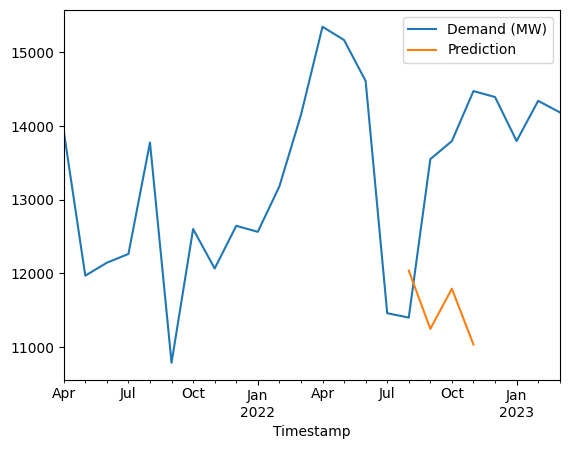

In [ ]:
pd.concat([final_df['Demand (MW)'],forecast_df],axis=1).plot()

In [ ]:
forecast1=model.predict(n_periods=8, return_conf_int=True)
forecast_range=pd.date_range(start='2022-08-08', periods=8,freq='M')

In [ ]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

<Axes: >

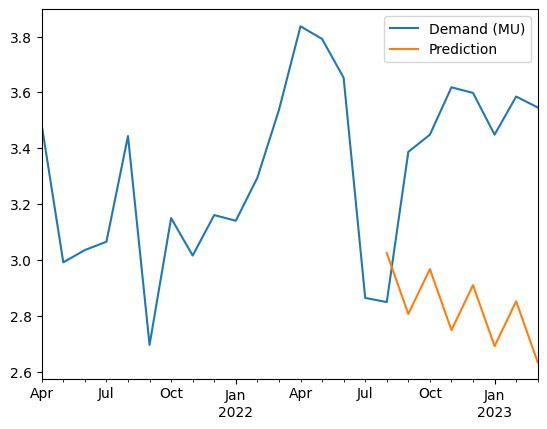

In [ ]:
pd.concat([final_df['Demand (MU)'],forecast1_df],axis=1).plot()

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
data = {
   'ds': pd.date_range(start='2021-04-01', periods=365, freq='D'),
    'y': [100 + x * 0.5 + 10 * (x % 30 == 0) for x in range(365)]
}
df = pd.DataFrame(data)

In [ ]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmparjxu190/cugglq7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmparjxu190/0s5k9t63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96007', 'data', 'file=/tmp/tmparjxu190/cugglq7l.json', 'init=/tmp/tmparjxu190/0s5k9t63.json', 'output', 'file=/tmp/tmparjxu190/prophet_modelptw9tdzq/prophet_model-20240620064954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:49:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:49:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=720)  # Forecast 30 days into the future

In [ ]:
forecast = model.predict(future)

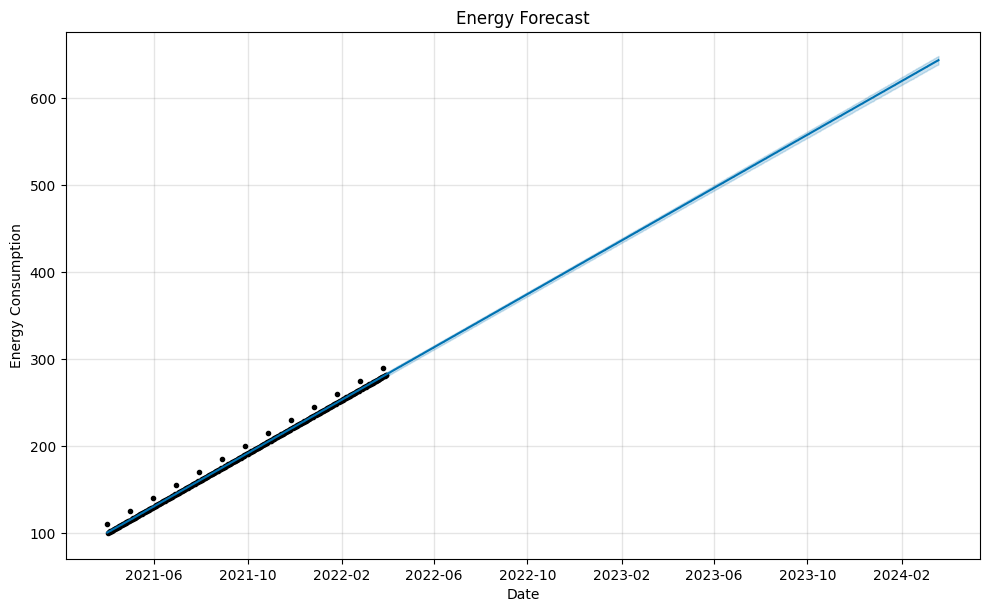

In [ ]:
fig = model.plot(forecast)
plt.title("Energy Forecast")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.show()

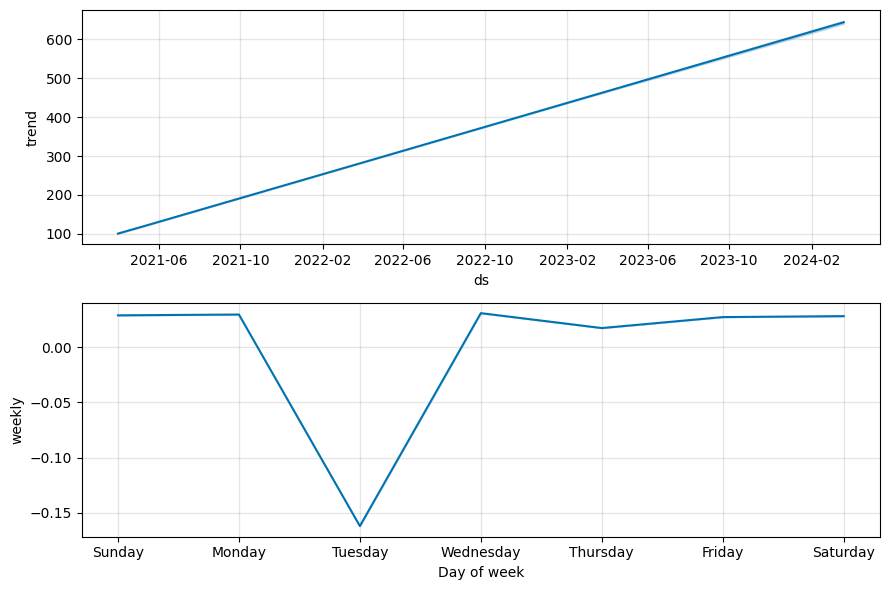

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load data
input_file = "demand.csv"  # Replace with your CSV file
data = pd.read_csv(input_file)

In [ ]:
# Compute volatility
data['mw_volatility'] = data['Demand (MW)'].pct_change().fillna(0)
data['mu_volatility'] = data['Demand (MU)'].pct_change().fillna(0)


In [ ]:
# Normalize data
scaler = MinMaxScaler()
data[['Demand (MW)', 'Demand (MU)', 'mw_volatility', 'mu_volatility']] = scaler.fit_transform(
    data[['Demand (MW)', 'Demand (MU)', 'mw_volatility', 'mu_volatility']]
)


In [ ]:
# Step 2: Define fuzzy variables for volatility
volatility = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'volatility')
power_demand = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'power_demand')

# Membership functions
volatility['low'] = fuzz.trapmf(volatility.universe, [0, 0, 0.2, 0.4])
volatility['medium'] = fuzz.trimf(volatility.universe, [0.3, 0.5, 0.7])
volatility['high'] = fuzz.trapmf(volatility.universe, [0.6, 0.8, 1, 1])

power_demand['stable'] = fuzz.trapmf(power_demand.universe, [0, 0, 0.3, 0.5])
power_demand['fluctuating'] = fuzz.trimf(power_demand.universe, [0.3, 0.5, 0.7])
power_demand['volatile'] = fuzz.trapmf(power_demand.universe, [0.6, 0.8, 1, 1])

In [ ]:
# Define fuzzy rules
rule1 = ctrl.Rule(volatility['low'], power_demand['stable'])
rule2 = ctrl.Rule(volatility['medium'], power_demand['fluctuating'])
rule3 = ctrl.Rule(volatility['high'], power_demand['volatile'])

# Fuzzy control system
volatility_control = ctrl.ControlSystem([rule1, rule2, rule3])
volatility_simulation = ctrl.ControlSystemSimulation(volatility_control)

In [ ]:
# Apply fuzzy logic to classify volatility
def classify_volatility(row):
    volatility_simulation.input['volatility'] = row['mw_volatility']
    volatility_simulation.compute()
    return volatility_simulation.output['power_demand']

data['fuzzy_volatility'] = data.apply(classify_volatility, axis=1)


In [ ]:
# Step 3: Prepare data for LSTM
time_steps = 10  # Number of time-steps
X = []
y = []
for i in range(len(data) - time_steps):
    X.append(data[['Demand (MW)', 'Demand (MU)', 'fuzzy_volatility']].iloc[i:i+time_steps].values)
    y.append(data['mw_volatility'].iloc[i + time_steps])

X, y = np.array(X), np.array(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1752/1752 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - loss: 0.0140 - val_loss: 0.0038
Epoch 2/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 3/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 4/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 5/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 6/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 7/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 8/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 9/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 10/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 11/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 12/20
1752/17

In [ ]:
# Step 5: Evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Importing necessary functions

y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Mean Absolute Error (MAE): 0.03800444973111728
Root Mean Squared Error (RMSE): 0.05061767713805142
R² Score: 0.4382276220322052


In [ ]:
# Step 6: Forecast MW and MU volatility
data['predicted_mw_volatility'] = np.concatenate(([0] * time_steps, model.predict(X).flatten()))

# Create a temporary DataFrame with all the original features
temp_df = pd.DataFrame({
    'Demand (MW)': data['Demand (MW)'],
    'Demand (MU)': data['Demand (MU)'],
    'mw_volatility': data['predicted_mw_volatility'],  # Use predicted volatility here
    'mu_volatility': data['mu_volatility']  # Keep the original MU volatility
})

# Apply inverse transform to the temporary DataFrame
data['predicted_mw'] = scaler.inverse_transform(temp_df)[
    :, 0
]  # Extract the 'Demand (MW)' column after inverse transform

data['predicted_mu'] = (data['predicted_mw'] * 1) / 1000  # Assuming 1-hour interval


2190/2190 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step


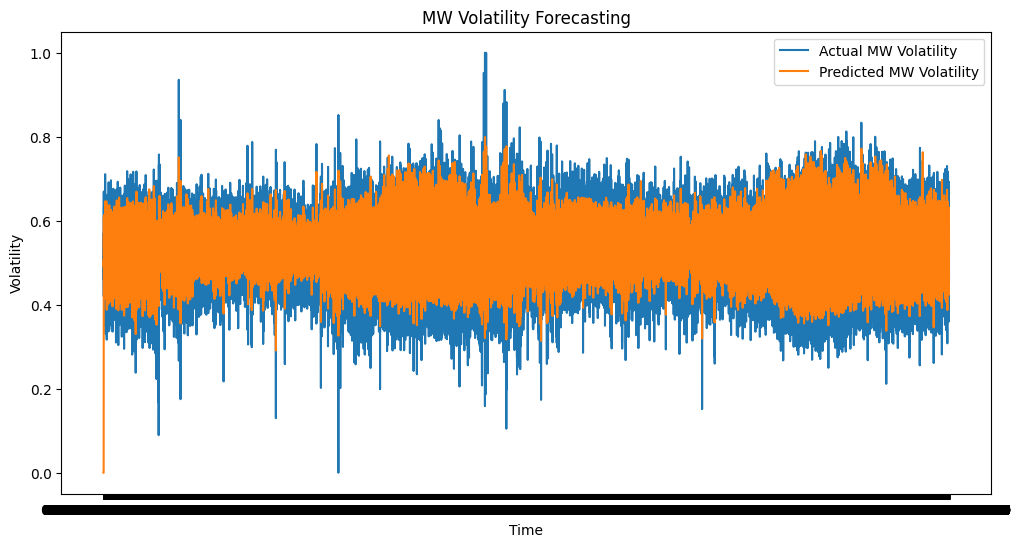

In [ ]:
# Step 7: Plot results
plt.figure(figsize=(12, 6))
# Assuming the timestamp column is named 'Timestamp'
plt.plot(data['Timestamp'], data['mw_volatility'], label="Actual MW Volatility")
plt.plot(data['Timestamp'], data['predicted_mw_volatility'], label="Predicted MW Volatility")
plt.legend()
plt.title("MW Volatility Forecasting")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.show()

In [ ]:
# Save results
output_file = "predicted_power_volatility.csv"
data.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")

Results saved to predicted_power_volatility.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

In [ ]:
# Step 1: Load data
input_file = "demand.csv"  # Replace with your CSV file
data = pd.read_csv(input_file)

# Example CSV columns: ['timestamp', 'mw_demand', 'mu_available']

# Compute volatility
data['mw_volatility'] = data['Demand (MW)'].pct_change().fillna(0)
data['mu_volatility'] = data['Demand (MU)'].pct_change().fillna(0)

In [ ]:
# Normalize data
scaler = MinMaxScaler()
data[['Demand (MW)', 'Demand (MU)', 'mw_volatility', 'mu_volatility']] = scaler.fit_transform(
    data[['Demand (MW)', 'Demand (MU)', 'mw_volatility', 'mu_volatility']]
)


In [ ]:
# Step 2: Apply DFT for denoising
def apply_dft(series, n_components=10):
    """Apply DFT to a series and retain n_components."""
    fft_values = fft(series)
    fft_values[n_components:] = 0  # Zero out higher frequencies
    filtered_series = ifft(fft_values).real
    return filtered_series

data['dft_mw_volatility'] = apply_dft(data['mw_volatility'].values)
data['dft_mu_volatility'] = apply_dft(data['mu_volatility'].values)

In [ ]:
# Step 3: Prepare data for LSTM
time_steps = 10
X = []
y = []
for i in range(len(data) - time_steps):
    X.append(data[['dft_mw_volatility', 'dft_mu_volatility']].iloc[i:i+time_steps].values)
# Step 3: Prepare data for LSTM
time_steps = 10
X = []
y = []
for i in range(len(data) - time_steps):
    X.append(data[['dft_mw_volatility', 'dft_mu_volatility']].iloc[i:i+time_steps].values)
    y.append(data['mw_volatility'].iloc[i + time_steps])

X, y = np.array(X), np.array(y)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1752/1752 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - loss: 0.0150 - val_loss: 0.0046
Epoch 2/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 3/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 4/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 5/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 6/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 7/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 8/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 9/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 10/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 11/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 12/20
1752/17

In [ ]:
# Step 5: Evaluate model
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Mean Absolute Error (MAE): 0.050343118232019625
Root Mean Squared Error (RMSE): 0.0678491626560592
R² Score: -0.009357334630476721


In [ ]:
# Step 6: Forecast volatility
data['predicted_mw_volatility'] = np.concatenate(([0] * time_steps, model.predict(X).flatten()))

# Create a temporary DataFrame with all original features, but using predicted MW volatility
temp_df = pd.DataFrame({
    'Demand (MW)': data['Demand (MW)'],  # Placeholder, will be replaced
    'Demand (MU)': data['Demand (MU)'],
    'mw_volatility': data['predicted_mw_volatility'],
    'mu_volatility': data['mu_volatility']
})

# Apply inverse transform to get the predicted MW values
predicted_values = scaler.inverse_transform(temp_df)

# Extract the predicted MW values from the inverse transformed array
data['predicted_mw'] = predicted_values[:, 0]

# Calculate predicted MU values
data['predicted_mu'] = (data['predicted_mw'] * 1) / 1000  # Assuming 1-hour interval


2190/2190 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step


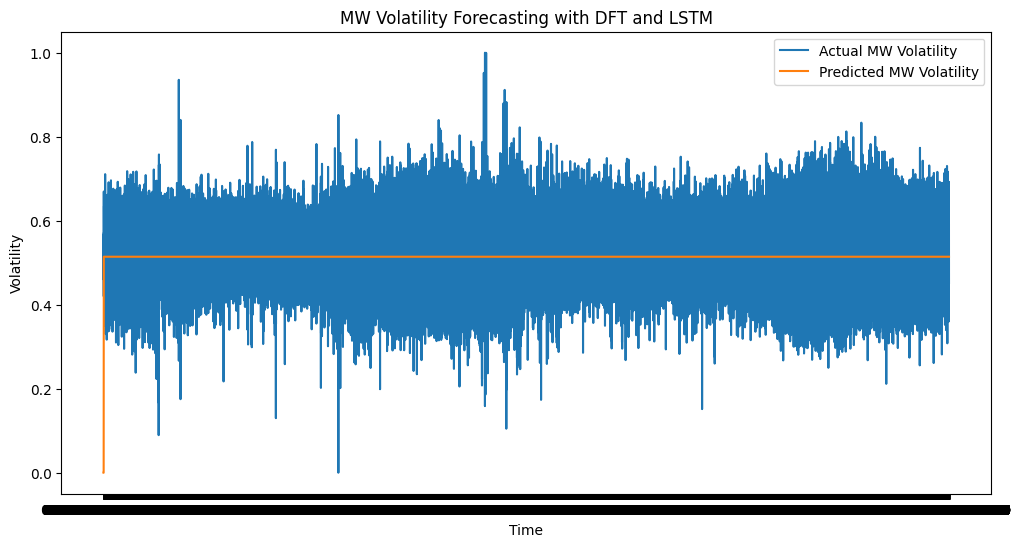

In [ ]:
# Step 7: Plot results
plt.figure(figsize=(12, 6))
plt.plot(data['Timestamp'], data['mw_volatility'], label="Actual MW Volatility")
plt.plot(data['Timestamp'], data['predicted_mw_volatility'], label="Predicted MW Volatility")
plt.legend()
plt.title("MW Volatility Forecasting with DFT and LSTM")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.show()

In [ ]:
# Save results
output_file = "predicted_power_volatility_dft_lstm.csv"
data.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")

Results saved to predicted_power_volatility_dft_lstm.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load data
input_file = "demand.csv"  # Replace with your CSV file
data = pd.read_csv(input_file)

# Example CSV columns: ['timestamp', 'mw_demand', 'mu_available']

# Compute volatility
data['mw_volatility'] = data['Demand (MW)'].pct_change().fillna(0)
data['mu_volatility'] = data['Demand (MU)'].pct_change().fillna(0)

In [ ]:
# Normalize data
scaler = MinMaxScaler()
data[['Demand (MW)', 'Demand (MU)', 'mw_volatility', 'mu_volatility']] = scaler.fit_transform(
    data[['Demand (MW)', 'Demand (MU)', 'mw_volatility', 'mu_volatility']]
)

In [ ]:
# Step 2: Define MDP states and transitions
# Define states based on volatility thresholds
def classify_state(volatility):
    if volatility < 0.2:
        return 0  # Low volatility
    elif volatility < 0.5:
        return 1  # Medium volatility
    else:
        return 2  # High volatility

data['state'] = data['mw_volatility'].apply(classify_state)


In [ ]:
# Calculate transition probabilities
transition_matrix = np.zeros((3, 3))  # For 3 states: Low, Medium, High
for i in range(1, len(data)):
    prev_state = data['state'].iloc[i - 1]
    curr_state = data['state'].iloc[i]
    transition_matrix[prev_state, curr_state] += 1


In [ ]:
# Normalize transition matrix
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)
print("Transition Matrix:")
print(transition_matrix)

# Add reward values (example: higher reward for stable states)
reward_values = {0: 1, 1: 0.5, 2: -1}
data['reward'] = data['state'].map(reward_values)


Transition Matrix:
[[0.00000000e+00 7.50000000e-01 2.50000000e-01]
 [4.10892384e-04 6.26050577e-01 3.73538530e-01]
 [2.30968219e-05 2.31037509e-01 7.68939394e-01]]


In [ ]:
# Step 3: Prepare data for LSTM
time_steps = 10
X = []
y = []
for i in range(len(data) - time_steps):
    features = data[['Demand (MW)', 'Demand (MU)', 'state', 'reward']].iloc[i:i + time_steps].values
    X.append(features)
    y.append(data['mw_volatility'].iloc[i + time_steps])

X, y = np.array(X), np.array(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1752/1752 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - loss: 0.0092 - val_loss: 0.0034
Epoch 2/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 3/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 4/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 5/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 6/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 7/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 8/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 9/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 11/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 12/20
1752/17

In [ ]:
# Step 5: Evaluate model
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Mean Absolute Error (MAE): 0.0374786019036225
Root Mean Squared Error (RMSE): 0.04961789065706427
R² Score: 0.46020040537324824


In [ ]:
# Step 6: Forecast volatility
data['predicted_mw_volatility'] = np.concatenate(([0] * time_steps, model.predict(X).flatten()))

# Create a temporary DataFrame with all original features, including predicted MW volatility
temp_df = pd.DataFrame({
    'Demand (MW)': data['Demand (MW)'],  # Placeholder, will be updated
    'Demand (MU)': data['Demand (MU)'],
    'mw_volatility': data['predicted_mw_volatility'],
    'mu_volatility': data['mu_volatility']
})

# Apply inverse transform to the temporary DataFrame
predicted_values = scaler.inverse_transform(temp_df)

# Update 'Demand (MW)' column with predicted values
data['predicted_mw'] = predicted_values[:, 0]

# Calculate predicted MU values (assuming relationship)
data['predicted_mu'] = (data['predicted_mw'] * 1) / 1000

2190/2190 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


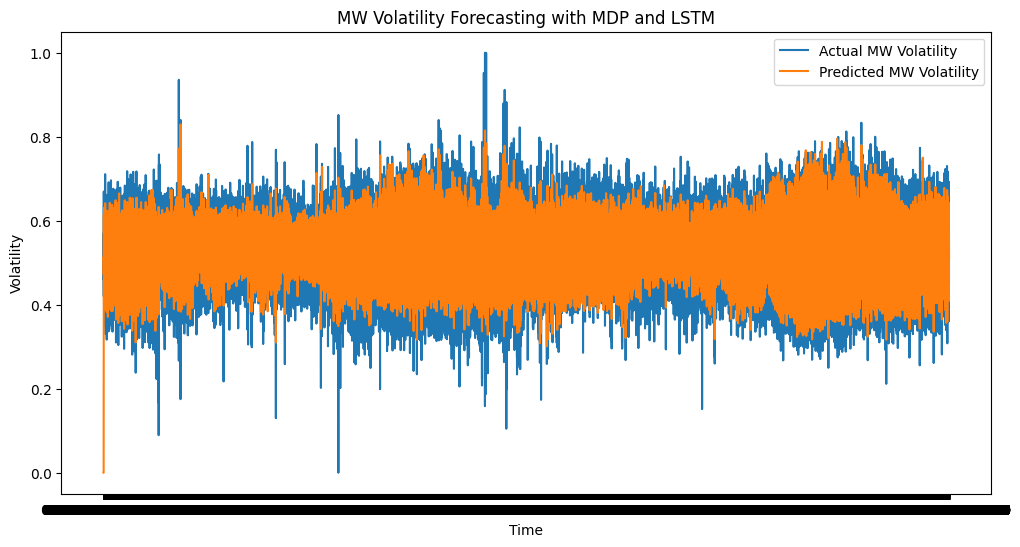

In [ ]:
# Step 7: Plot results
plt.figure(figsize=(12, 6))
plt.plot(data['Timestamp'], data['mw_volatility'], label="Actual MW Volatility")
plt.plot(data['Timestamp'], data['predicted_mw_volatility'], label="Predicted MW Volatility")
plt.legend()
plt.title("MW Volatility Forecasting with MDP and LSTM")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.show()

In [ ]:
# Save results
output_file = "predicted_power_volatility_mdp_lstm.csv"
data.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")

Results saved to predicted_power_volatility_mdp_lstm.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load data
input_file = "demand.csv"  # Replace with your CSV file
data = pd.read_csv(input_file)

# Example CSV columns: ['timestamp', 'mw_demand', 'mu_available']

# Compute volatility
data['mw_volatility'] = data['Demand (MW)'].pct_change().fillna(0)
data['mu_volatility'] = data['Demand (MU)'].pct_change().fillna(0)
# Normalize data
scaler = MinMaxScaler()
data[['Demand (MW)', 'Demand (MU)', 'mw_volatility', 'mu_volatility']] = scaler.fit_transform(
    data[['Demand (MW)', 'Demand (MU)', 'mw_volatility', 'mu_volatility']]
)

In [ ]:
# Step 2: Fuzzy logic for feature engineering
def fuzzy_membership(value, ranges):
    """Calculate fuzzy membership for 'Low', 'Medium', and 'High'."""
    low, medium, high = ranges
    low_val = max(0, (medium - value) / (medium - low))
    medium_val = max(0, (value - low) / (medium - low)) * max(0, (high - value) / (high - medium))
    high_val = max(0, (value - medium) / (high - medium))
    return low_val, medium_val, high_val

fuzzy_ranges = {
    'Demand (MW)': (0.2, 0.5, 0.8),  # Example thresholds
    'Demand (MU)': (0.2, 0.5, 0.8)
}

# Correct the column names here:
for col in ['Demand (MW)', 'Demand (MU)']:
    data[f'{col}_low'], data[f'{col}_medium'], data[f'{col}_high'] = zip(*data[col].apply(
        lambda x: fuzzy_membership(x, fuzzy_ranges[col])
    ))

In [ ]:
# Step 3: Define MDP states and transitions
def classify_state(volatility):
    """Classify volatility into discrete states."""
    if volatility < 0.2:
        return 0  # Low volatility
    elif volatility < 0.5:
        return 1  # Medium volatility
    else:
        return 2  # High volatility

data['state'] = data['mw_volatility'].apply(classify_state)


In [ ]:
# Calculate transition probabilities
transition_matrix = np.zeros((3, 3))  # For 3 states: Low, Medium, High
for i in range(1, len(data)):
    prev_state = data['state'].iloc[i - 1]
    curr_state = data['state'].iloc[i]
    transition_matrix[prev_state, curr_state] += 1

In [ ]:
# Normalize transition matrix
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)
print("Transition Matrix:")
print(transition_matrix)


Transition Matrix:
[[0.00000000e+00 7.50000000e-01 2.50000000e-01]
 [4.10892384e-04 6.26050577e-01 3.73538530e-01]
 [2.30968219e-05 2.31037509e-01 7.68939394e-01]]


In [ ]:
# Add reward values (example: higher reward for stable states)
reward_values = {0: 1, 1: 0.5, 2: -1}
data['reward'] = data['state'].map(reward_values)


In [ ]:
# Step 4: Prepare data for LSTM
time_steps = 10
X = []
y = []
for i in range(len(data) - time_steps):
    # Corrected feature names to match the fuzzy membership column names
    features = data[
        ['Demand (MW)_low', 'Demand (MW)_medium', 'Demand (MW)_high',
         'Demand (MU)_low', 'Demand (MU)_medium', 'Demand (MU)_high',
         'state', 'reward']
    ].iloc[i:i + time_steps].values
    X.append(features)
    y.append(data['mw_volatility'].iloc[i + time_steps])

X, y = np.array(X), np.array(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - loss: 0.0107 - val_loss: 0.0034
Epoch 2/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 3/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 4/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 5/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 6/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 7/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 8/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 9/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 10/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 11/20
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 12

In [ ]:
# Step 6: Evaluate model
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Mean Absolute Error (MAE): 0.03662989435200862
Root Mean Squared Error (RMSE): 0.048839515008853494
R² Score: 0.4770036669092228


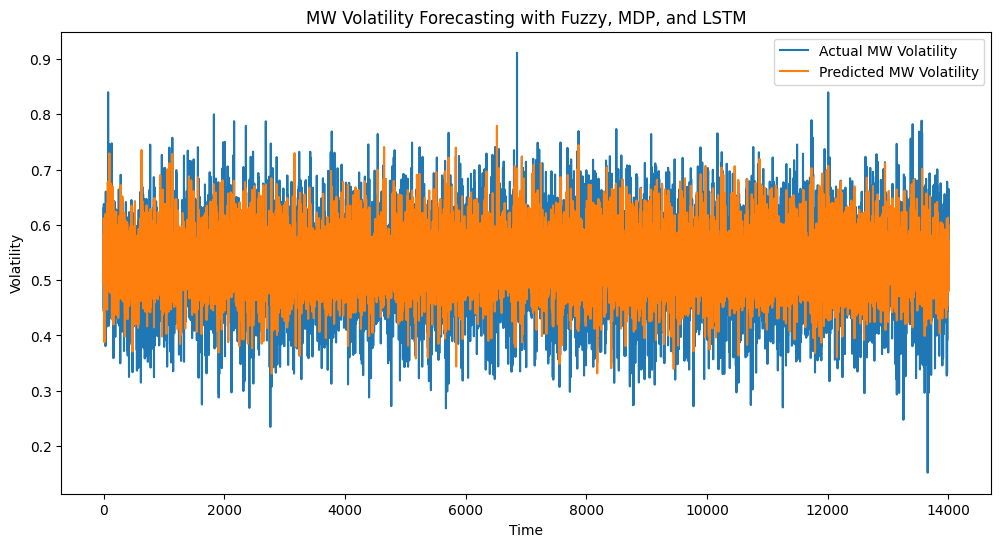

In [ ]:
# Step 7: Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual MW Volatility")
plt.plot(y_pred, label="Predicted MW Volatility")
plt.legend()
plt.title("MW Volatility Forecasting with Fuzzy, MDP, and LSTM")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.show()

In [ ]:
# Save results
output_file = "predicted_power_volatility_fuzzy_mdp_lstm.csv"
data.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")

Results saved to predicted_power_volatility_fuzzy_mdp_lstm.csv
